C:\Users\alima\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


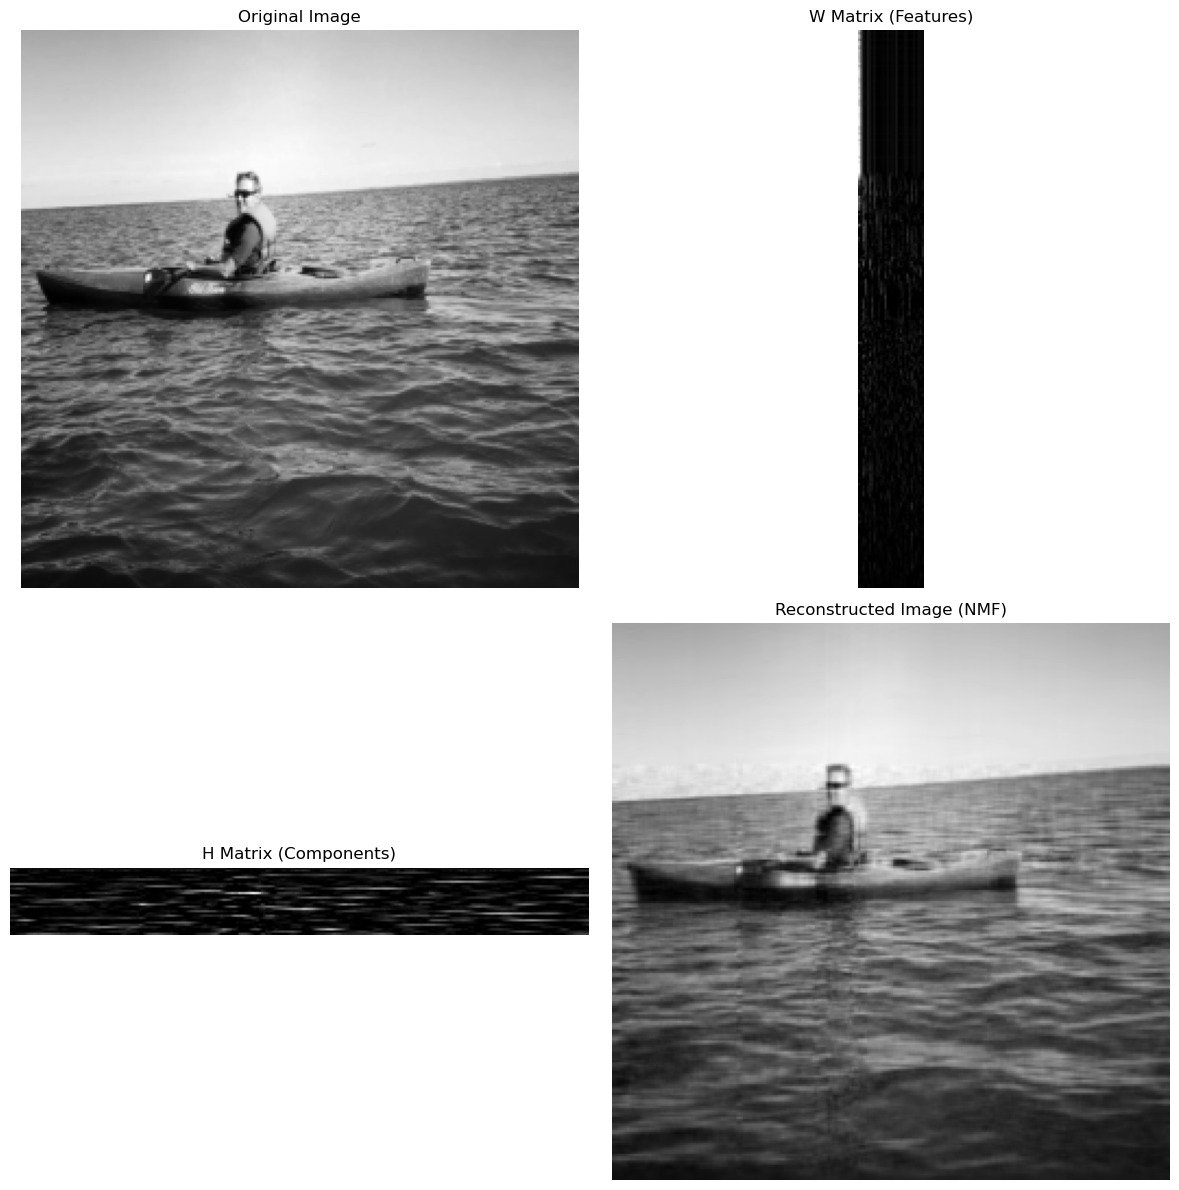

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.decomposition import NMF

# Update the path to your image file
image_path = r'Screenshot 2023-07-16 235910.png'

# Load the image in grayscale
image = imread(image_path, as_gray=True)

# Resize the image to 256x256 for easier processing (optional)
image_resized = resize(image, (256, 256), anti_aliasing=True)

# Apply Non-negative Matrix Factorization (NMF)
# Ensure the image has non-negative values
image_resized = np.clip(image_resized, 0, 1)

nmf_model = NMF(n_components = 30, init = 'random', random_state = 0)
W = nmf_model.fit_transform(image_resized)
H = nmf_model.components_

# Reconstruct the image using NMF components
reconstructed_image_nmf = W @ H

# Plot the original image and the decomposed matrices (W, H)
fig, axs = plt.subplots(2, 2, figsize = (12, 12))

# Original image
axs[0, 0].imshow(image_resized, cmap = 'gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# W matrix visualization
axs[0, 1].imshow(W, cmap = 'gray')
axs[0, 1].set_title('W Matrix (Features)')
axs[0, 1].axis('off')

# H matrix visualization
axs[1, 0].imshow(H, cmap = 'gray')
axs[1, 0].set_title('H Matrix (Components)')
axs[1, 0].axis('off')

# Reconstructed image
axs[1, 1].imshow(reconstructed_image_nmf, cmap = 'gray')
axs[1, 1].set_title('Reconstructed Image (NMF)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
